In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [2]:
df = pd.read_csv('../../Python for ML/DATA/penguins_size.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df = df.dropna()

In [5]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [6]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)

In [9]:
y = df['species']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
rfc = RandomForestClassifier(n_estimators=10, max_features='sqrt', random_state=101)

In [16]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [17]:
preds = rfc.predict(X_test)

In [19]:
cm = confusion_matrix(y_test, preds)

<Axes: >

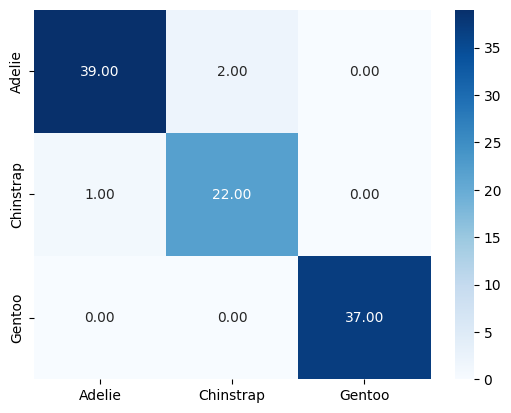

In [20]:
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=y.unique(), yticklabels=y.unique())

In [21]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



In [24]:
rfc.feature_importances_

array([0.31867744, 0.1018487 , 0.17343398, 0.21316964, 0.14512091,
       0.03720114, 0.00632264, 0.00422556])

In [27]:
test_errors = []
def find_test_errors():
    for i in range(1, 40):
        model = RandomForestClassifier(n_estimators=i, random_state=42)
        model.fit(X_train, y_train)
        test_preds = model.predict(X_test)
        test_errors.append(1 - accuracy_score(test_preds, y_test))

find_test_errors()

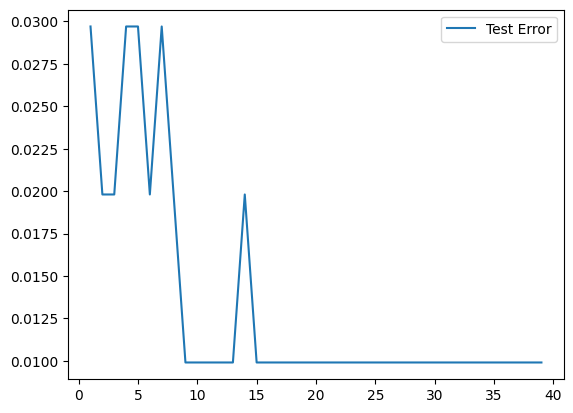

In [28]:
plt.plot(range(1, 40), test_errors, label='Test Error')
plt.legend()

<h3>Random Forest - Hyperparameter Tuning</h3>

In [29]:
df = pd.read_csv('../../Python for ML/DATA/data_banknote_authentication.csv')

In [30]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


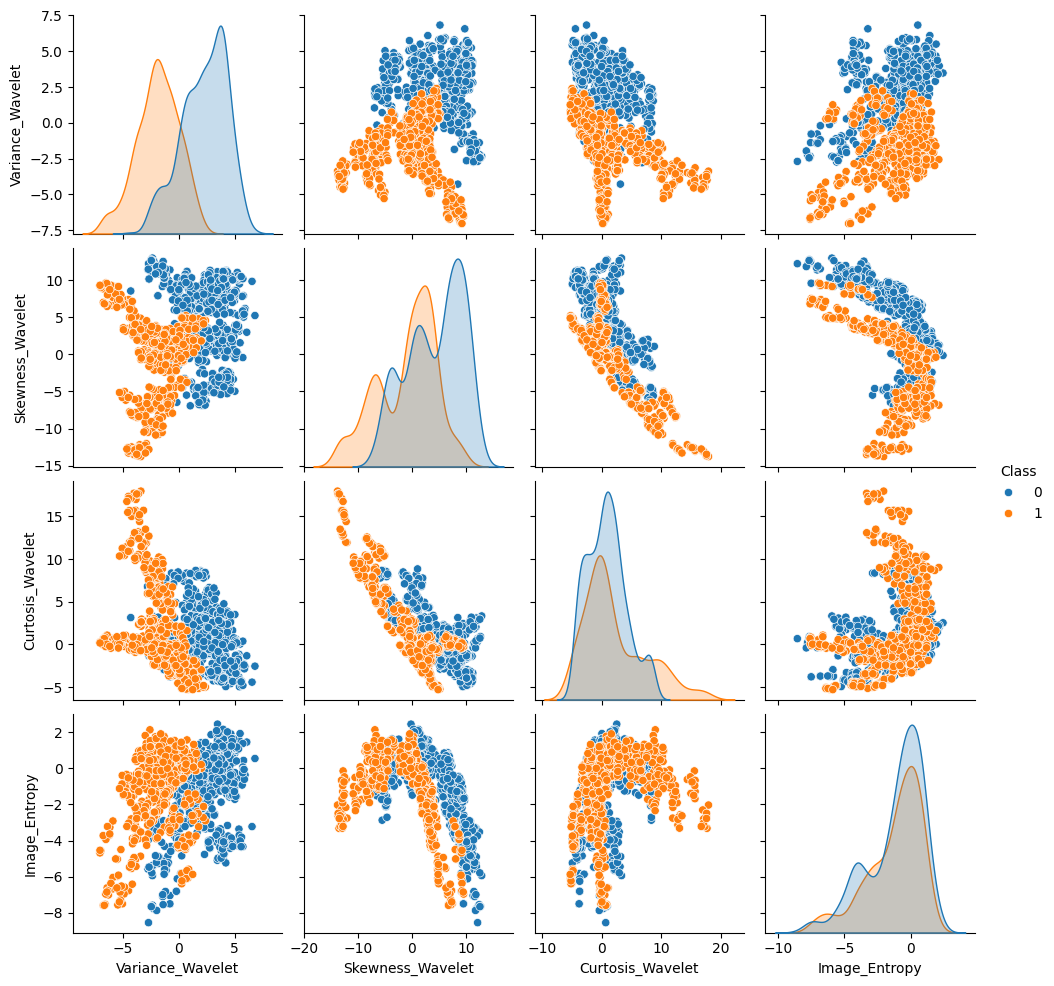

In [32]:
sns.pairplot(df, hue='Class')

In [33]:
X = df.drop('Class', axis=1)

In [34]:
y = df['Class']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [37]:
n_estimators = [64, 100, 128, 200]

In [38]:
max_features = [2, 3, 4]

In [39]:
bootstrap = [True, False]

In [40]:
oob_score = [True, False]

In [41]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'bootstrap': bootstrap,
    'oob_score': oob_score
}

In [42]:
rfc = RandomForestClassifier()

In [43]:
grid = GridSearchCV(rfc, param_grid)

In [44]:
grid.fit(X_train, y_train)

/usr/local/Cellar/jupyterlab/4.4.0_1/libexec/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/Cellar/jupyterlab/4.4.0_1/libexec/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/Cellar/jupyterlab/4.4.0_1/libexec/lib/python3.13/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/Cellar

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [45]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64, 'oob_score': False}

In [49]:
rfc = RandomForestClassifier(max_features=2, n_estimators=64, oob_score=True)

In [50]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=64, oob_score=True)

In [51]:
rfc.oob_score_

0.9939965694682675

In [52]:
predictions = rfc.predict(X_test)

In [54]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



In [55]:
cm = confusion_matrix(y_test, predictions)

<Axes: >

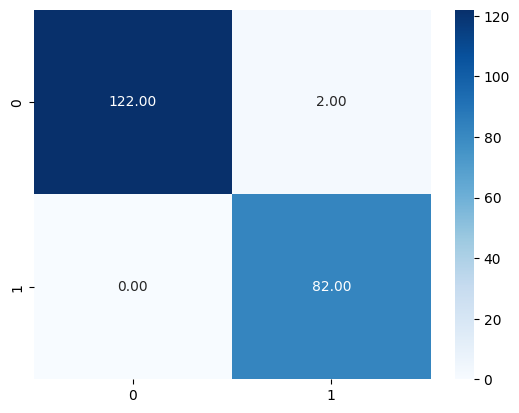

In [56]:
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=y.unique(), yticklabels=y.unique())

In [58]:
errors = []
misclassification = []

for i in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=i, max_features=2)
    rfc.fit(X_train, y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(y_test, preds)
    n_missed = np.sum(y_test != preds)
    errors.append(err)
    misclassification.append(n_missed)

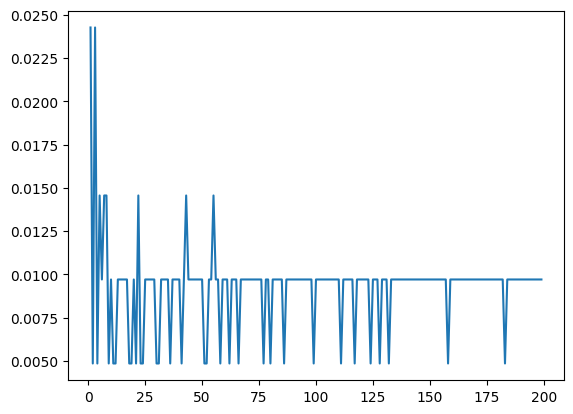

In [59]:
plt.plot(range(1, 200), errors)

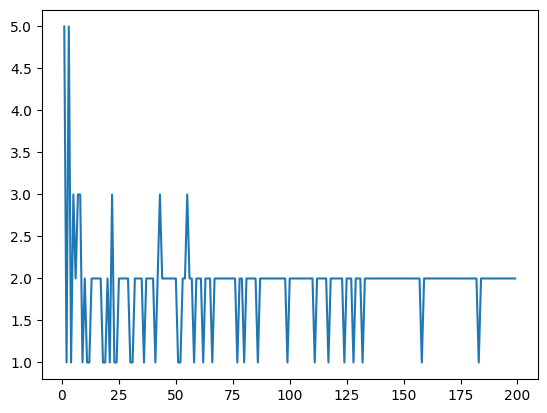

In [60]:
plt.plot(range(1, 200), misclassification)